# Imports

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import sys


import xobjects as xo
import xtrack as xt
import xpart as xp

sys.path.append('../')
import BBStudies.Base.XsuitePlus as xPlus
import BBStudies.Base.InteractionPoint as inp

LINEFOLDER   = '../Data/Lines/'
SURVEYFOLDER = '../Data/Surveys/'
df_columns = ['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy','ddx','ddpx','ddy','ddpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy']


line   = {}
twiss  = {}
survey = {}

# Importing survey
# Importing twiss
for seq in ['lhcb4']:
    _beam = seq[-2:]
    
    # Importing Line
    line[_beam] = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')
    
    # Importing twiss and tracker
    if _beam == 'b1':
        tracker = xt.Tracker(line=line[_beam])
        xtwiss  = tracker.twiss()
    else:
        xtwiss  = xt.Tracker(line=line[_beam]).twiss()
    
    twiss[_beam]= pd.DataFrame(xtwiss,columns = df_columns)
    twiss[_beam].set_index('name',inplace=True)


# Creating twiss b2 from b4
#==========================================
twiss_b2 = xPlus.twiss_b2_from_b4(twiss['b4'])


# Filtering
twiss_b2 = xPlus.filter_twiss(twiss_b2,entries=['drift','..','bbcw'])
twiss_b4 = xPlus.filter_twiss(twiss['b4'],entries=['drift','..','bbcw'])

# Clearing xsuite ouput
clear_output(wait=False)


# Importing b2 from mad
madtwiss = {}
madtwiss['b2'] = pd.read_pickle(f'../Data/Checks/b1_with_bb_V2/twiss_opticsfile32_lhcb2.pkl')
madtwiss['b2'].index = pd.Series(madtwiss['b2'].index).apply(lambda idx: idx.split('[')[0])
madtwiss['b2'].drop(columns=['name'],inplace=True)
madtwiss['b2'].index.name='name'

madtwiss_b2 = madtwiss['b2']

madtwiss_b2 = xPlus.filter_twiss(madtwiss_b2,entries=['drift','..','bbcw'])





--- 

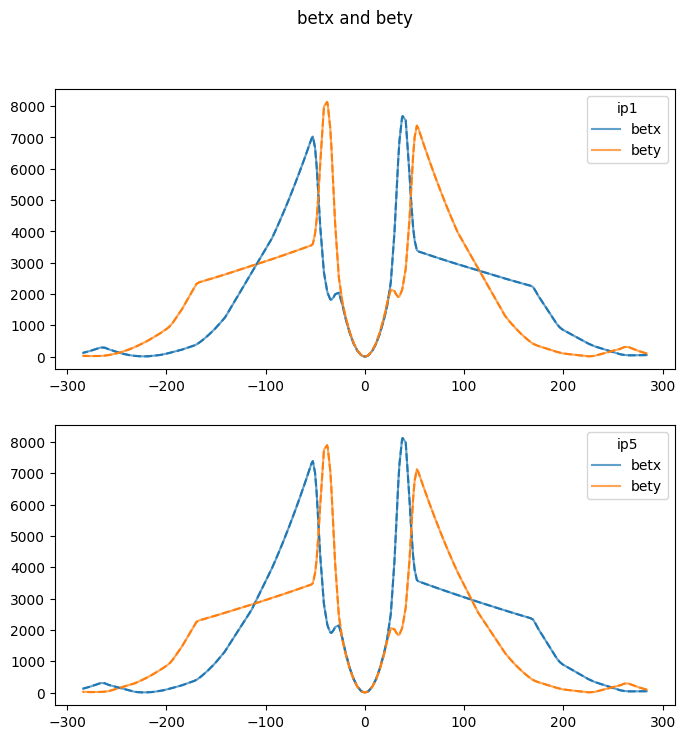

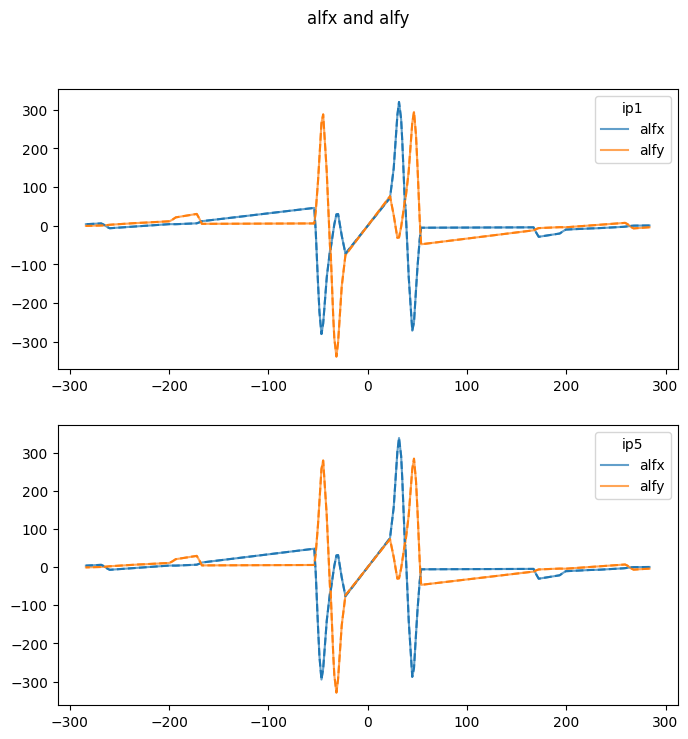

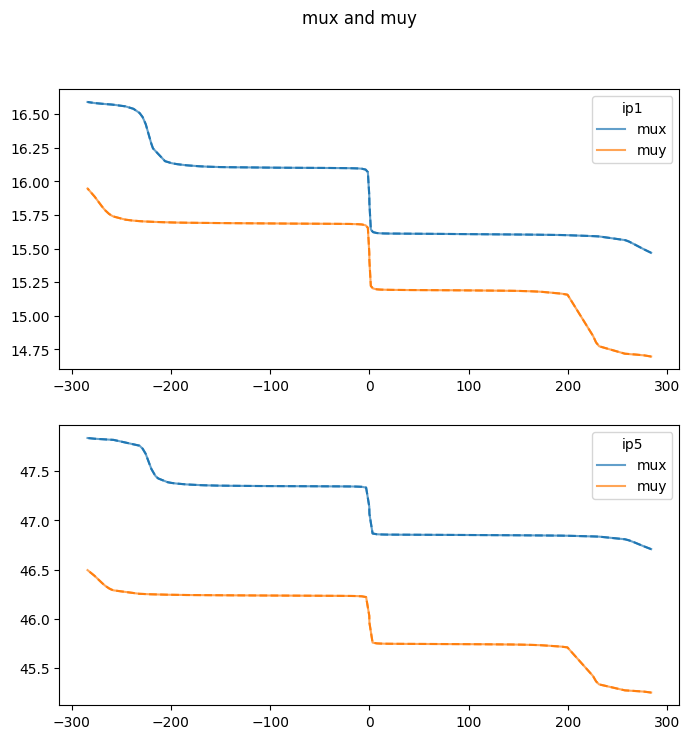

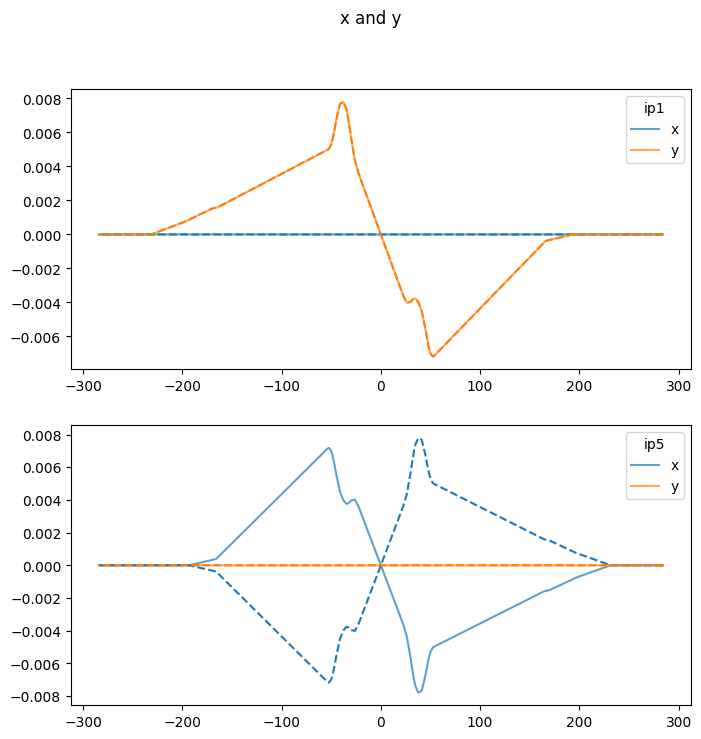

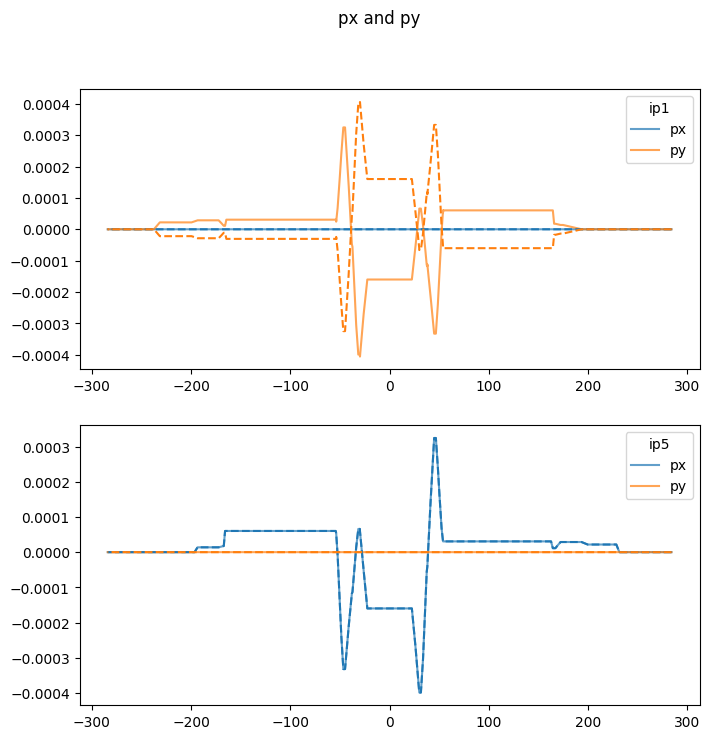

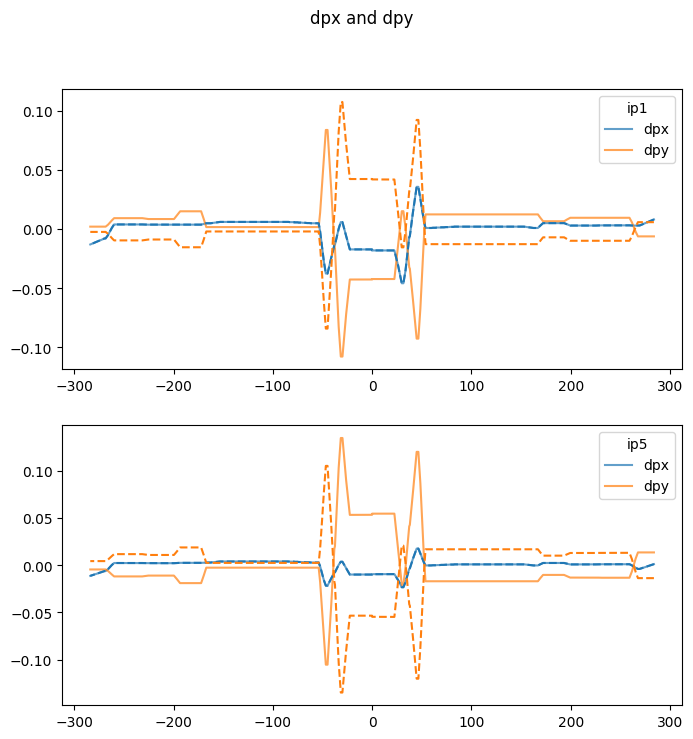

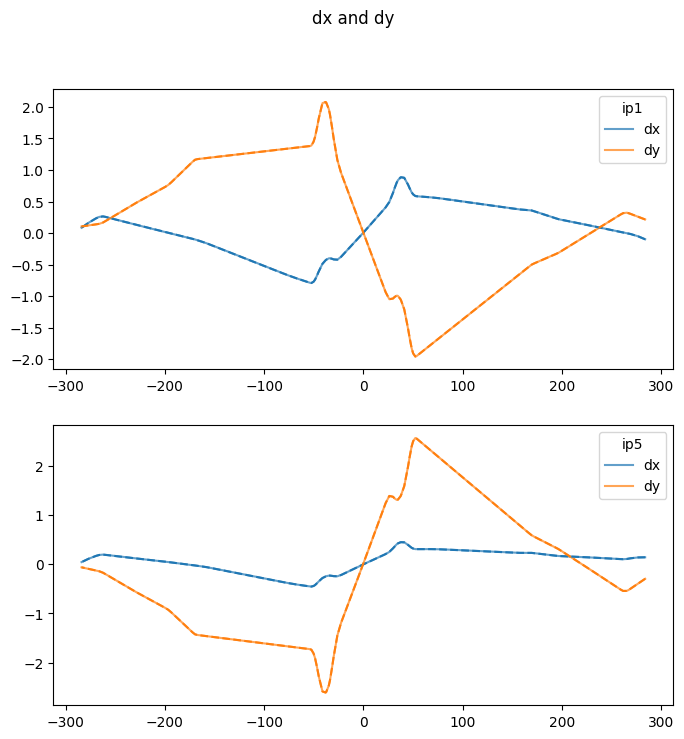

In [3]:
chosenIPs = ['ip1','ip5']
for param in ['betx','alfx','mux','x','px','dpx','dx']:

    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f"{param} and {param.replace('x','y')}")

    for _IP,ax in zip(chosenIPs,axes.flatten()):

        # ROI around IP
        beam='b2'
        ROI_twiss_b4  = twiss_b4.loc[f'mb.a8r{_IP[-1]}.{beam}_den':f'mb.a8l{_IP[-1]}.{beam}_dex']

        beam='b2'
        ROI_twiss_b2  = twiss_b2.loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex']


        plt.sca(ax)
        
        plt.plot(ROI_twiss_b2.s - ROI_twiss_b2.loc[_IP,'s'],ROI_twiss_b2[param],color='C0',alpha=0.7,label=param)
        plt.plot(ROI_twiss_b2.s - ROI_twiss_b2.loc[_IP,'s'] ,ROI_twiss_b2[param.replace('x','y')],color='C1',alpha=0.7,label=param.replace('x','y'))

        plt.plot(-(ROI_twiss_b4.s - ROI_twiss_b4.loc[_IP,'s']) ,ROI_twiss_b4[param],color='C0',ls='--')
        plt.plot(-(ROI_twiss_b4.s - ROI_twiss_b4.loc[_IP,'s']) ,ROI_twiss_b4[param.replace('x','y')],color='C1',ls='--')

        plt.legend(title=_IP)